In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [126]:
def load_generation_data(exclude_files=None):
    # data/generation 디렉토리 경로
    data_dir = '/Users/jangseohyun/Documents/workspace/symply/DER/data/generation'
    
    # 디렉토리 내의 모든 CSV 파일 목록 가져오기
    all_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.csv')])
    
    # 제외할 파일 처리
    if exclude_files is not None:
        files_to_load = [f for f in all_files if f not in exclude_files]
    else:
        files_to_load = all_files
    
    # 선택된 파일들 불러오기
    data_frames = {}
    loaded_files = []
    for file in files_to_load:
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path)
        data_frames[file] = df
        loaded_files.append(file)
    print(f"총 {len(loaded_files)}개를 불러왔습니다 ({', '.join(loaded_files)})")
    
    return data_frames

In [127]:
def plot_daily_generation(data_frames, selected_dates=None):
    # 첫 번째 데이터를 기준으로 날짜 목록 가져오기
    first_df = list(data_frames.values())[0]
    dates_array = np.array(first_df['Date'].unique())
    
    # selected_dates 처리
    if selected_dates is None:
        # None이면 모든 날짜 사용
        dates_to_plot = dates_array
    elif isinstance(selected_dates, (int, np.integer)):
        # 숫자 하나만 입력한 경우
        dates_to_plot = [dates_array[selected_dates]]
    elif isinstance(selected_dates, list):
        # 날짜 리스트를 입력한 경우
        dates_to_plot = [dates_array[i] for i in selected_dates]
    else:
        raise ValueError("selected_dates must be None, int, or list of ints")
    
    n_colors = len(data_frames)
    cmap = plt.cm.get_cmap('tab20', n_colors)  # 'tab20'에서 n_colors 개수만큼 추출
    colors = [cmap(i) for i in range(n_colors)]  # 색상을 리스트로 저장

    
    # 각 선택된 날짜별로 플랏
    for date in dates_to_plot:
        plt.figure(figsize=(15, 9))
        
        # 최대 발전량 값을 저장할 변수
        max_generation = 0
        
        # 각 발전기(CSV 파일)별로 플랏
        for idx, (file_name, df) in enumerate(data_frames.items()):
            mask = df['Date'] == date
            daily_hours = df[mask]['Hour (Eastern Time, Daylight-Adjusted)'].to_numpy()
            daily_generation = pd.to_numeric(df[mask]['Electricity Generated'], errors='coerce').to_numpy()
            
            if len(daily_generation) > 0:
                max_generation = max(max_generation, np.nanmax(daily_generation))
            
            label = f'DER {file_name.split(".")[0]}'
            plt.plot(daily_hours, daily_generation, label=label, 
                    color=colors[idx], marker='o')
        
        # y축 눈금 설정 - 최대값을 500 단위로 올림하고 여유 공간 추가
        y_max = np.ceil(max_generation / 500) * 50 # 500 단위로 올림
        y_max = y_max + 500  # 위쪽에 여유 공간 추가
        y_ticks = np.linspace(0, y_max, 5)  # 10개의 균등한 간격
        plt.ylim(0, y_max)  # y축 범위 설정
        plt.yticks(y_ticks)
        
        plt.title(f'Daily Generation - {date}')
        plt.xlabel('Hour')
        plt.ylabel('Electricity Generated (kW)')
        plt.legend(loc='upper left')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.xticks(range(0, 24))
        plt.tight_layout()
        plt.show()

총 20개를 불러왔습니다 (106.csv, 1113.csv, 1341.csv, 137.csv, 228.csv, 236.csv, 248.csv, 261.csv, 281.csv, 401.csv, 430.csv, 524.csv, 525.csv, 673.csv, 689.csv, 692.csv, 745.csv, 765.csv, 775.csv, 89.csv)


/var/folders/2_/9m9qjphn0xs45xzpvf1hl0j00000gn/T/ipykernel_52762/574350574.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n_colors)  # 'tab20'에서 n_colors 개수만큼 추출


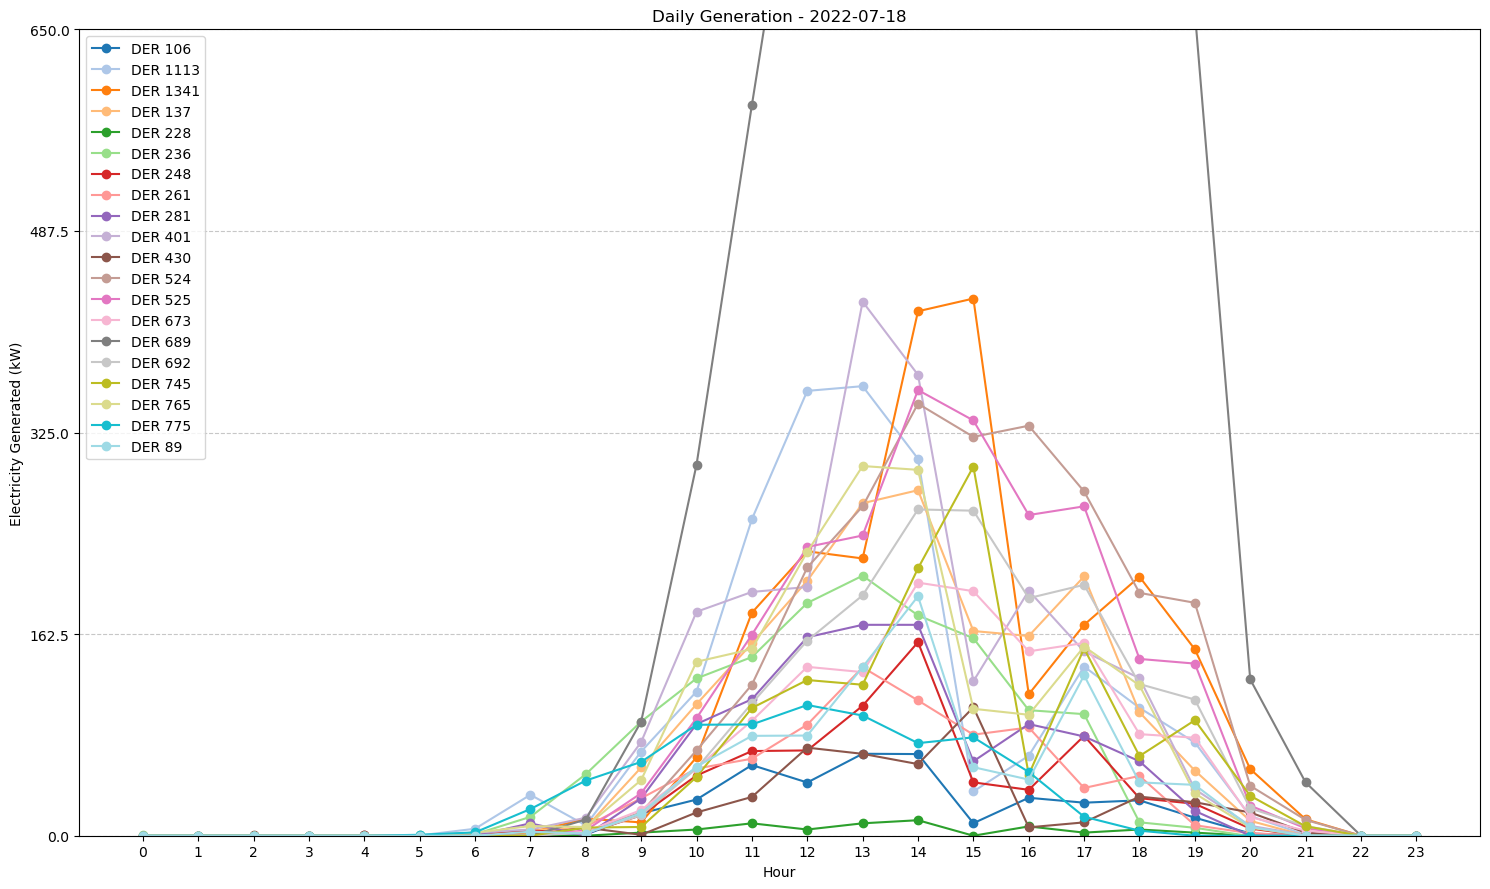

In [128]:
data = load_generation_data()
plot_daily_generation(data, 18)
# 합격: 89, 430, 401, 281, 228
# 애매: 689, 248, 1113, 1341
# 불합: 106, 137, 745, 765

총 8개를 불러왔습니다 (137.csv, 281.csv, 401.csv, 430.csv, 524.csv, 692.csv, 775.csv, 89.csv)


/var/folders/2_/9m9qjphn0xs45xzpvf1hl0j00000gn/T/ipykernel_52762/574350574.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n_colors)  # 'tab20'에서 n_colors 개수만큼 추출


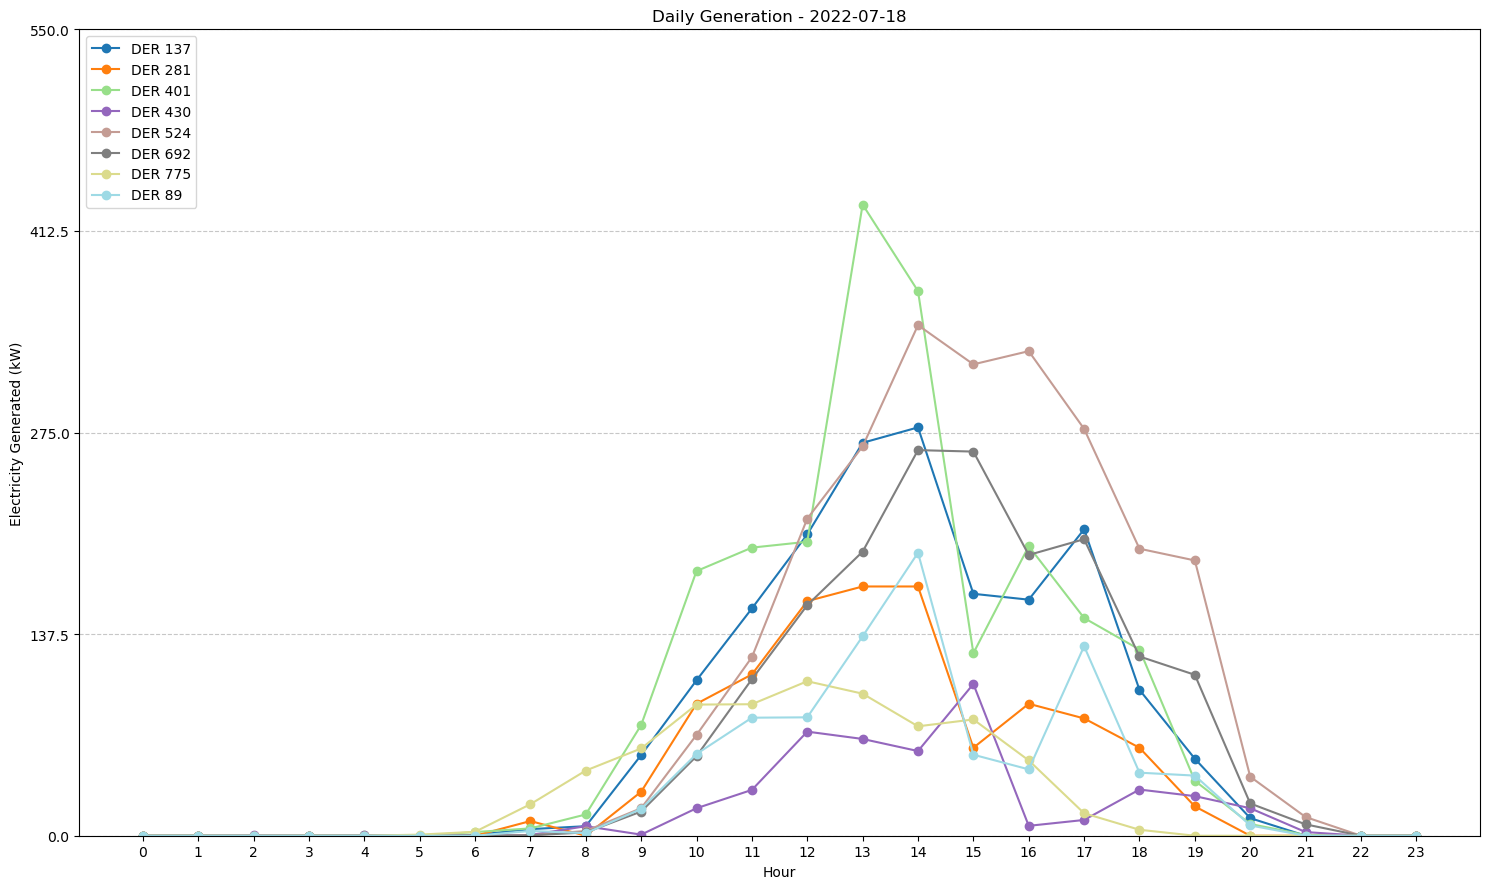

In [133]:
exclude_files = ['106.csv', '228.csv', '236.csv', '248.csv','261.csv', '525.csv', '673.csv', '745.csv', '765.csv', '689.csv', '1113.csv', '1341.csv']
data = load_generation_data(exclude_files)
plot_daily_generation(data, 18)